In [20]:
!python3 -m pip install sounddevice pydub

Defaulting to user installation because normal site-packages is not writeable


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy

import pydub 


# Playing the sound!
import sounddevice as sd
import time

In [2]:

# p = pyaudio.PyAudio()

# volume = 0.5  # range [0.0, 1.0]
# fs = 44100  # sampling rate, Hz, must be integer
# duration = 5.0  # in seconds, may be float
# f = 440.0  # sine frequency, Hz, may be float

# # generate samples, note conversion to float32 array
# samples = (np.sin(2 * np.pi * np.arange(fs * duration) * f / fs)).astype(np.float32)

# # per @yahweh comment explicitly convert to bytes sequence
# output_bytes = (volume * samples).tobytes()

# # for paFloat32 sample values must be in range [-1.0, 1.0]
# stream = p.open(format=pyaudio.paFloat32,
#                 channels=1,
#                 rate=fs,
#                 output=True)

# # play. May repeat with different volume values (if done interactively)
# start_time = time.time()
# stream.write(output_bytes)
# print("Played sound for {:.2f} seconds".format(time.time() - start_time))

# stream.stop_stream()
# stream.close()

# p.terminate()

In [3]:
volume = 0.2  # range [0.0, 1.0]
fs = 44100  # sampling rate, Hz, must be integer
duration = 10.0  # in seconds, may be float
f = 8400.0  # sine frequency, Hz, may be float

# generate samples, note conversion to float32 array
samples = volume*(np.sin(2 * np.pi * np.arange(fs * duration) * f / fs)).astype(np.float32)

# Gradient of the signal

grad = np.logspace(0, 1, len(samples))

changed_samples = np.multiply(samples, grad)

# sd.play( changed_samples, fs )



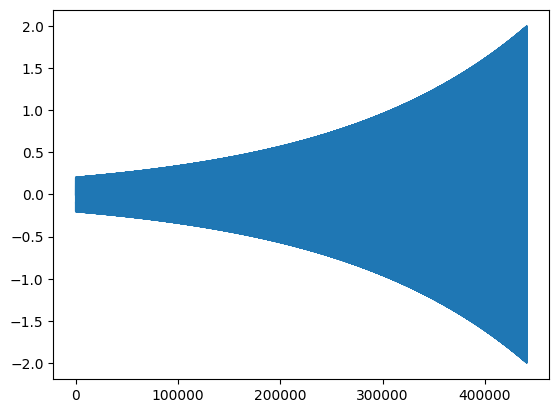

In [5]:
import matplotlib.pyplot as plt

plt.plot(changed_samples)

In [23]:
def write(f, sr, x, normalized=False):
    """numpy array to MP3"""
    channels = 2 if (x.ndim == 2 and x.shape[1] == 2) else 1
    if normalized:  # normalized array - each item should be a float in [-1, 1)
        y = np.int16(x * 2 ** 15)
    else:
        y = np.int16(x)
    song = pydub.AudioSegment(y.tobytes(), frame_rate=sr, sample_width=2, channels=channels)
    song.export(f, format="mp3", bitrate="320k")

In [24]:
write("test.wav", fs, changed_samples, normalized=True)